# data loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%load_ext jupyternotify
%autonotify -a 30

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('dark_background')
import datetime, math
from tqdm.notebook import tqdm

In [11]:
from models.data import *
from models.utils import *

In [1011]:
names = ['IMOEX', 'ICE.BRN', 'FUTSEE-100', 'comex.GC', 'SANDP-500', 'RI.RTSI', 'SPFB.MIX']
dates = ['111101_131031', '131101_151031', '151101_171031', '171101_191031', '191101_211031'] #
data_5m = load_data(names, dates, path='data/')
data_5m = data_5m.loc[data_5m.date != '2012-12-26 19:40:00', :]

  0%|          | 0/7 [00:00<?, ?it/s]

In [1012]:
idx = ['imoex', 'brent', 'ftse', 'snp', 'gold', 'rtsi', 'mix']
data_5m = prepare_data(data_5m, idx)
data_day = make_daily_data(data_5m, idx).dropna()
# data_hour = make_daily_data(data_5m, idx)
# data_5m = data_5m[2:].set_index('date')

In [956]:
names = ['IMOEX']
dates = ['111101_131031', '131101_151031', '151101_171031', '171101_191031', '191101_211031'] #
data_5m = load_data(names, dates, path='data/')
data_5m = data_5m.loc[data_5m.date != '2012-12-26 19:40:00', :]
idx = ['imoex']
data_5m = prepare_data(data_5m, idx)
data_day = make_daily_data(data_5m, idx).dropna()

  0%|          | 0/1 [00:00<?, ?it/s]

In [1014]:
data_usd = load_currency('USD')
data_eur = load_currency('EUR')

In [1015]:
data_yield = load_yield_ru(['1-Year', '5-Year', '10-Year'])

In [1016]:
data_day = data_day.join(data_usd, how='left').join(data_eur, how='left').join(data_yield, how='left').dropna()

In [18]:
data_day.to_csv('data/data.csv', index=False)

# yahoo

In [20]:
import yfinance as yf

In [141]:
tickers = ['gazp.me', 'sber.me', 'lkoh.me', 'gmkn.me', 'nvtk.me', 'mgnt.me', 'rosn.me', 'tatn.me', 'mtss.me', 'sngs.me']

In [142]:
def ret(x):
    return (x - x.shift()) / x.shift()

In [215]:
data_list = []
for ticker in tickers:
    stock = yf.Ticker(ticker)
    ticker = ticker.split('.')[0]
    stock_data = stock.history(period='max')
    # stock_data = stock_data.reset_index()
    # stock_data['date'] = pd.to_datetime(stock_data.Date)
    # stock_data = stock_data.set_index('date')
    
    if ticker == 'sber':
        stock_data.loc['2012-03-14', 'Close'] = stock_data.loc['2012-03-14', 'Open']
        stock_data.loc['2012-03-16', 'Close'] = stock_data.loc['2012-03-16', 'Open']
    if ticker == 'gazp':
        pass
    
    # stock_data = stock_data.reset_index()
    stock_data['return'] = stock_data['Close'].pct_change()
    try:
        stock_data = stock_data.drop(['Date', 'Dividends', 'Stock Splits'], axis=1)
    except KeyError:
        pass
    stock_data.columns = [f'{c.lower()}_{ticker}' for c in stock_data.columns]
    stock_data.index.name = 'date'
    stock_data = stock_data.reset_index()
    data_list.append(stock_data)

SyntaxError: EOL while scanning string literal (Temp/ipykernel_24020/1828277036.py, line 13)

In [230]:
df = yf.download(tickers=tickers, period='max', interval='1d', auto_adjust=True, prepost=False)

[*********************100%***********************]  10 of 10 completed


<AxesSubplot:xlabel='Date'>

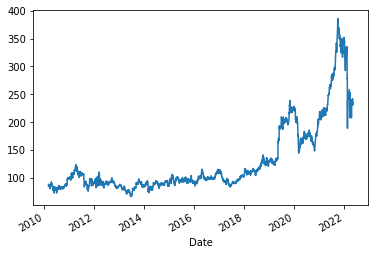

In [236]:
df['Close', 'GAZP.ME'].plot()

In [187]:
from functools import reduce
data = reduce(lambda df1, df2: pd.merge(df1, df2, how='outer', on='date'), data_list)
data = data.set_index('date')

In [188]:
returns_tickers = ['return_gazp', 'return_sber', 'return_lkoh', 'return_gmkn', 'return_nvtk', 'return_mgnt', 'return_rosn', 'return_tatn', 'return_mtss', 'return_sngs']

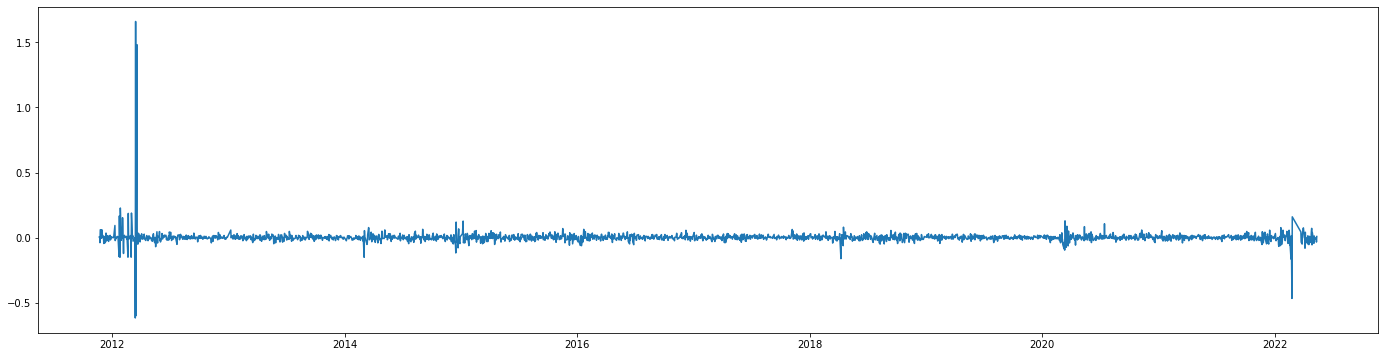

In [195]:
plt.figure(figsize=(24,6))
plt.plot(data['return_sber'])

In [216]:
stock = yf.Ticker('gazp.ME')

In [217]:
stock_data = stock.history(period='max')

In [218]:
stock_data['return'] = stock_data['Close'].pct_change()

In [247]:
stock_data.loc[stock_data['return'] > 0.15]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,return
Date,,,,,,,,
2012-01-31,96.415440,97.387730,81.849811,97.123520,227722,0.0,0,0.175005
2012-02-17,99.982254,114.001222,89.950629,100.658630,181860,0.0,0,0.164504
2012-02-21,99.871288,106.007828,5.047992,100.959831,189254256,0.0,0,0.179999
2012-03-15,105.155493,110.285652,42.013584,105.266464,159228,0.0,0,0.184932
2019-05-14,133.766531,155.842107,133.479298,155.784668,163073090,0.0,0,0.164601
2022-02-25,208.009995,244.940002,191.600006,238.000000,211877250,0.0,0,0.258593


In [246]:
pd.to_datetime('2012-02-21').weekday()

1

In [225]:
stock_data.loc[['2012-01-27', '2012-01-30', '2012-01-31', '2012-02-01', '2012-02-02', '2012-02-03']]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,return
Date,,,,,,,,
2012-01-27,97.192207,107.917013,83.390157,93.201057,192939,0.0,0,0.120968
2012-01-30,96.177644,106.969244,82.657928,82.657928,186601,0.0,0,-0.113122
2012-01-31,96.415440,97.387730,81.849811,97.123520,227722,0.0,0,0.175005
2012-02-01,98.090527,106.597553,58.144117,92.061523,184913,0.0,0,-0.052119
2012-02-02,98.264887,98.999390,83.107386,98.999390,198708,0.0,0,0.075361
2012-02-03,98.291326,100.241196,83.772156,100.241196,186135,0.0,0,0.012544


In [213]:
stock_data.loc['2012-03-14', 'Close'] = stock_data.loc['2012-03-14', 'Open']
stock_data.loc['2012-03-16', 'Close'] = stock_data.loc['2012-03-16', 'Open']

<AxesSubplot:xlabel='Date'>

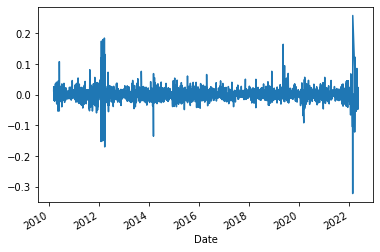

In [221]:
stock_data['return'].plot()

<AxesSubplot:xlabel='Date'>

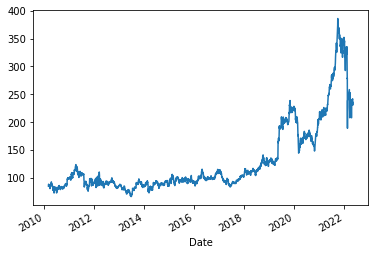

In [227]:
stock_data['Close'].plot()

# investing

In [252]:
import investpy

df = investpy.get_stock_historical_data(stock='gazp',
                                        country='Russia',
                                        from_date='01/01/2011',
                                        to_date='01/01/2021')

<AxesSubplot:xlabel='Date'>

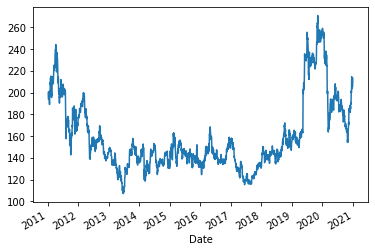

In [254]:
df.Close.plot()

# finam

In [537]:
from finam import Exporter, Market, Timeframe
from enum import IntEnum

class Market(IntEnum):

    """
    Markets mapped to ids used by finam.ru export
    List is incomplete, extend it when needed
    """

    SHARES = 1
    BONDS = 2
    COMMODITIES = 24
    CURRENCIES_WORLD = 5
    CURRENCIES = 45
    ETF = 28
    ETF_MOEX = 515
    FUTURES = 14  # non-expired futures
    FUTURES_ARCHIVE = 17  # expired futures
    FUTURES_USA = 7
    INDEXES_WORLD = 6
    INDEXES = 91
    SPB = 517
    USA = 25
    CRYPTO_CURRENCIES = 520

In [357]:
# exporter = Exporter()
# # print('*** Current Russian ruble exchange rates ***')
# rub = exporter.lookup(name='USDRUB_TOD')
# assert len(rub) == 1
# data = exporter.download(rub.index[0], market=Market.CURRENCIES)
# print(data.tail(1))

In [447]:
exporter.lookup(code='GC', market=Market.COMMODITIES)

,name,code,market
id,,,
18953,Золото,GC,24


In [372]:
datetime.date(2010,1,1)

datetime.date(2010, 1, 1)

In [766]:
def multi_merge(df_list, on=None, how='outer'):
    from functools import reduce
    return reduce(lambda df1, df2: pd.merge(df1, df2, on=on, how=how), df_list)

class FinamDataLoader():
    def __init__(self):
        self.exporter = Exporter()

    def load(self, name, market=Market.SHARES, timeframe=Timeframe.DAILY, start_date=None, end_date=None):
        if start_date is None:
            start_date = datetime.date(2010,1,1)
        if end_date is None:
            end_date = datetime.date.today()
            
        if market == Market.CURRENCIES:
            idx = exporter.lookup(name=name, market=market).index[0]
        else:
            idx = exporter.lookup(code=name, market=market).index[0]
        
        data = exporter.download(
            idx, 
            market=market,
            start_date=start_date,
            end_date=end_date,
            timeframe=timeframe)
        
        data = data.reset_index(drop=True)
        data.columns = map(lambda x: x.replace('<', '').replace('>', '').lower(), data.columns)
        data = data.rename({'vol': 'volume'}, axis=1)
        data['date'] = pd.to_datetime(data['date'].astype(str)+data['time'], format='%Y%m%d%H:%M:%S')
        data = data.drop('time', axis=1)
        data = data.drop_duplicates('date')
        data['return'] = data['close'].pct_change()
        data['openret'] = data['open'].pct_change()
        data['highret'] = data['high'].pct_change()
        data['lowret'] = data['low'].pct_change()
        data['highlow'] = data['high'] - data['low']
        data.columns = [column+('_'+name.lower())*bool(column not in ['date_time', 'date', 'time']) for column in data.columns]
        return data
    
    def load_multiple(self, names, market=Market.SHARES, timeframe=Timeframe.DAILY, start_date=None, end_date=None):
        df_list = [self.load(n, market=market, timeframe=timeframe, start_date=start_date, end_date=end_date) for n in tqdm(names)]
        return multi_merge(df_list, on='date').sort_values('date')

In [708]:
commodities = {
    'Gold': 'GC',
    'Gas': 'NG',
    'Brent': 'BZ',
}
currencies = {
    'USD': 'USDRUB_TOD',
    'EUR': 'EURRUB_TOD',
}
shares = ['GAZP', 'SBER', 'LKOH', 'GMKN', 'NVTK', 'MGNT', 'ROSN', 'TATN', 'MTSS', 'SNGS']
indexes = {
    'IMOEX': 'IMOEX',
    'RTSI': 'RTSI',
    'MOEX_oilgas': 'MOEXOG',
    'MOEX_electric': 'MOEXEU',
    'MOEX_telecom': 'MOEXTL',
    'MOEX_mining': 'MOEXMM',
    'MOEX_finance': 'MOEXFN',
    'MOEX_goods': 'MOEXCN',
    'MOEX_chemicals': 'MOEXCH',
    'MOEX_transport': 'MOEXTN',
    'MOEX_innovation': 'MOEXINN',
}
indexes_world = {
    'FTSE': 'UKX',
    'SnP': 'INX',
    'NASDAQ': 'NDX'
}
futures = {
    'MIX': 'MIX',
}

In [547]:
commodities_list = [
    FinamDataLoader().load_ticker('BZ', market=Market.COMMODITIES, timeframe=Timeframe.DAILY),
    FinamDataLoader().load_ticker('NG', market=Market.COMMODITIES, timeframe=Timeframe.DAILY),
    FinamDataLoader().load_ticker('GC', market=Market.COMMODITIES, timeframe=Timeframe.DAILY),
]

In [ ]:
commodities_list = [
    FinamDataLoader().load_ticker('BZ', market=Market.COMMODITIES, timeframe=Timeframe.DAILY),
    FinamDataLoader().load_ticker('NG', market=Market.COMMODITIES, timeframe=Timeframe.DAILY),
    FinamDataLoader().load_ticker('GC', market=Market.COMMODITIES, timeframe=Timeframe.DAILY),
]

In [548]:
def multi_merge(df_list, on=None, how='outer'):
    from functools import reduce
    return reduce(lambda df1, df2: pd.merge(df1, df2, on=on, how=how), df_list)

In [551]:
data = multi_merge(commodities_list, on=['date']).sort_values('date')

In [714]:
data_curr = FinamDataLoader().load_multiple(['USDRUB_TOD', 'EURRUB_TOD'], market=Market.CURRENCIES, timeframe=Timeframe.DAILY)

In [709]:
data_shares = FinamDataLoader().load_multiple(names=shares, market=Market.SHARES, timeframe=Timeframe.DAILY)

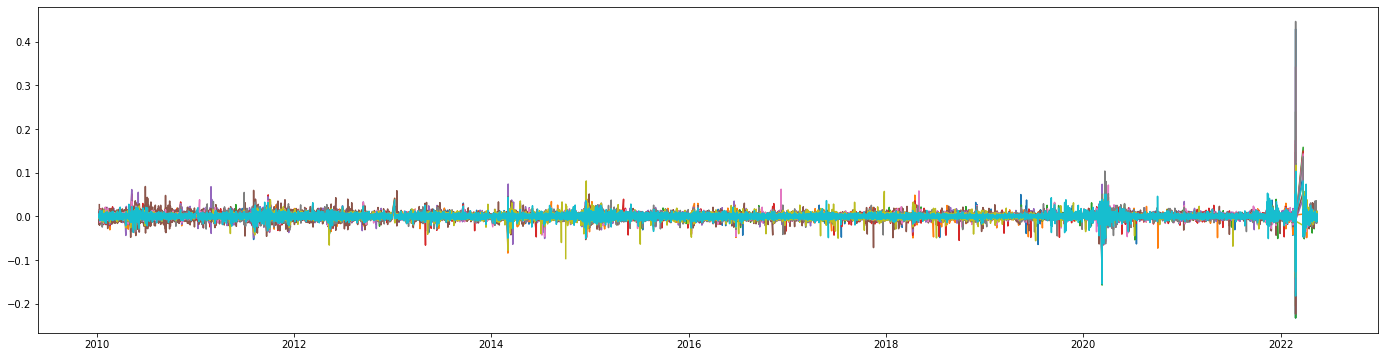

In [921]:
plt.figure(figsize=(24,6))
plt.plot(data_shares.date, data_shares[[f'return_{s.lower()}' for s in shares]])

In [945]:
data_imoex = FinamDataLoader().load(name='IMOEX', market=Market.INDEXES_WORLD, timeframe=Timeframe.MINUTES5)

<IPython.core.display.Javascript object>

In [947]:
data_imoex.to_csv('data/IMOEX_5m.csv', index=False)

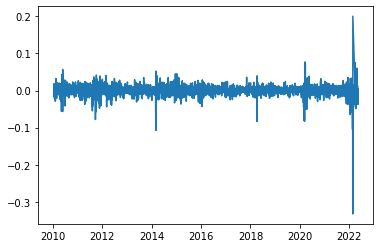

In [952]:
plt.plot(data_imoex_day.index, data_imoex_day.return_imoex)

In [737]:
{c.split('_')[-1] for c in data_imoex.columns}-{'date'}

{'imoex'}

In [749]:
def make_daily(data):
    idx = {c.split('_')[-1] for c in data.columns}-{'date'}
    op = {f'open_{d}': 'first' for d in idx}
    cl = {f'close_{d}': 'last' for d in idx}
    hi = {f'high_{d}': 'max' for d in idx}
    lo = {f'low_{d}': 'min' for d in idx}
    vo = {f'volume_{d}': 'mean' for d in idx}

    groupdict = op
    for i in (cl, hi, lo, vo):
        groupdict.update(i)
    
    data_day = data.groupby(data.date.dt.date).aggregate(groupdict)
    for i in idx:
        data_day[f'return_{i}'] = data_day[f'close_{i}'].pct_change()
        data_day[f'volatility_{i}'] = data.groupby(data.date.dt.date).aggregate({f'return_{i}': lambda x: np.sqrt((x**2).sum())})
        data_day[f'highlow_{i}'] = (data_day[f'high_{i}'] - data_day[f'low_{i}']) / data_day[f'low_{i}']
    data_day.index = pd.DatetimeIndex(data_day.index)
    
    return data_day.dropna()

In [949]:
data_imoex_day = make_daily(data_imoex)

In [953]:
data_imoex_day.to_csv('data/IMOEX_day.csv', index=True)

In [750]:
data_commodities = FinamDataLoader().load_multiple(names=['BZ', 'NG', 'GC'], market=Market.COMMODITIES, timeframe=Timeframe.MINUTES5)

<IPython.core.display.Javascript object>

In [751]:
data_commodities.to_csv('data/commodities_5m.csv', index=False)

<IPython.core.display.Javascript object>

In [754]:
data_commodities_day = make_daily(data_commodities)

In [762]:
data_indices = FinamDataLoader().load_multiple(names=['UKX', 'INX'], market=Market.INDEXES_WORLD, timeframe=Timeframe.MINUTES5)

<IPython.core.display.Javascript object>

In [763]:
data_indices.to_csv('data/indexes_5m.csv', index=False)

In [764]:
data_indices_day = make_daily(data_indices)

In [765]:
data_indices_day.to_csv('data/indexes_day.csv', index=True)

In [767]:
data_indices_day

,open_inx,open_ukx,close_inx,close_ukx,high_inx,high_ukx,low_inx,low_ukx,volume_inx,volume_ukx,return_inx,volatility_inx,highlow_inx,return_ukx,volatility_ukx,highlow_ukx
date,,,,,,,,,,,,,,,,
2010-01-05,1133.05,5500.41,1136.40,5522.50,1136.63,5536.38,1129.66,5480.71,0.000000,0.000000,0.003010,0.004470,0.006170,0.005039,0.005438,0.010157
2010-01-06,1136.41,5520.85,1136.99,5526.43,1139.19,5536.44,1134.04,5497.65,0.000000,0.000000,0.000519,0.004103,0.004541,0.000712,0.005568,0.007056
2010-01-07,1137.03,5530.03,1141.48,5526.72,1142.29,5551.63,1131.61,5499.80,0.000000,0.000000,0.003949,0.005416,0.009438,0.000052,0.006890,0.009424
2010-01-08,1141.53,5526.62,1144.70,5531.04,1145.39,5549.25,1136.22,5494.79,0.000000,0.000000,0.002821,0.005492,0.008071,0.000782,0.007646,0.009911
2010-01-11,1147.96,5534.49,1146.90,5538.07,1149.65,5600.48,1142.02,5527.90,0.000000,0.000000,0.001677,0.005800,0.006681,0.001271,0.009360,0.013130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-09,4081.27,7387.94,3991.24,7216.58,4081.27,7391.59,3975.48,7216.58,275.087500,1045.980583,-0.032037,0.023059,0.026611,-0.023195,0.009521,0.024251
2022-05-10,4051.08,7216.58,4001.05,7243.22,4068.82,7311.65,3958.17,7216.58,276.531646,992.711538,0.002458,0.024558,0.027955,0.003691,0.009886,0.013174
2022-05-11,3991.12,7243.22,3935.18,7347.66,4049.09,7349.70,3928.82,7238.97,268.637500,1112.586538,-0.016463,0.020296,0.030612,0.014419,0.010039,0.015296


In [874]:
data_futures = FinamDataLoader().load(name='MIX', market=Market.FUTURES, timeframe=Timeframe.MINUTES5)
data_futures.to_csv('data/futures_5m.csv', index=False)
data_futures_day = make_daily(data_futures)
data_futures_day.to_csv('data/futures_day.csv', index=True)

<IPython.core.display.Javascript object>

In [809]:
data_sectors = FinamDataLoader().load_multiple(names=['MOEXOG', 'MOEXEU', 'MOEXTL', 'MOEXMM', 'MOEXFN', 'MOEXCN', 'MOEXCH'], market=Market.INDEXES, timeframe=Timeframe.DAILY)
data_sectors.to_csv('data/sectors_day.csv', index=False)

  0%|          | 0/7 [00:00<?, ?it/s]

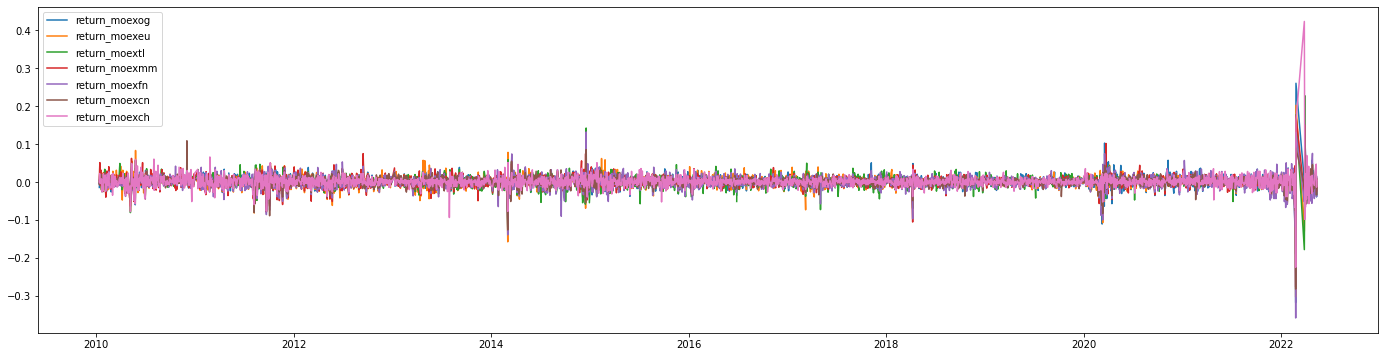

In [815]:
plt.figure(figsize=(24,6))
var = [f'return_{s.lower()}' for s in indexes]
plt.plot(data_sectors.date, data_sectors[var])
plt.legend(var)

In [816]:
data_rtsi = FinamDataLoader().load(name='RTSI', market=Market.INDEXES, timeframe=Timeframe.MINUTES5)
data_rtsi.to_csv('data/rtsi_5m.csv', index=False)
data_rtsi_day = make_daily(data_rtsi)
data_rtsi_day.to_csv('data/rtsi_day.csv', index=True)

<IPython.core.display.Javascript object>

In [825]:
data_imoex_day.loc[data_imoex_day.volume_imoex > 1e10] = data_imoex_day.loc[data_imoex_day.volume_imoex > 1e10] / 100

<AxesSubplot:xlabel='date'>

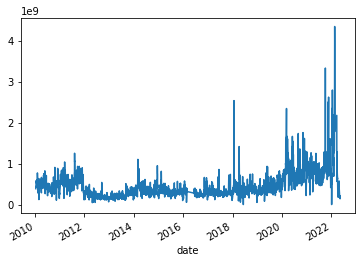

In [828]:
data_imoex_day.volume_imoex.plot()

In [761]:
exporter.lookup(name='Nikkei', market=Market.INDEXES_WORLD)

FinamObjectNotFoundError: 

In [936]:
look = exporter.lookup(code='IMOEX')
look.loc[look['market'] == Market.INDEXES.value].index[0]

420450

In [944]:
exporter.lookup(code='IMOEX')

,name,code,market
id,,,
13851,Индекс МосБиржи,IMOEX,6
420450,IMOEX,IMOEX,91


In [630]:
idx = exporter.lookup(code='LKOH').index[0]
data = exporter.download(
    idx, 
    market=Market.SHARES,
    start_date=datetime.date(2011, 1, 1),
    end_date=datetime.date(2022, 1, 1))

In [631]:
data.columns = map(lambda x: x.replace('<', '').replace('>', '').lower(), data.columns)

In [632]:
data['date'] = pd.to_datetime(data['date'].astype(str)+data['time'], format='%Y%m%d%H:%M:%S')
# data['<TIME>'] = pd.to_datetime(data['<TIME>'], format='%H:%M:%W')

In [633]:
data.loc[data.date == '2019-12-30']

,date,time,open,high,low,close,vol
2262,2019-12-30,00:00:00,6153.0,6174.5,6144.0,6169.0,397296


In [634]:
data.shape

(2769, 7)

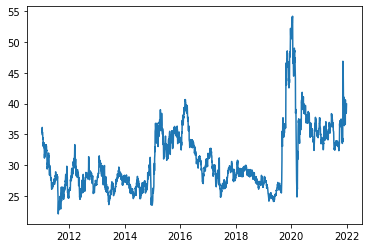

In [612]:
plt.plot(data.date, data.close)

# all

In [963]:
data_imoex = pd.read_csv('data/IMOEX_day.csv', parse_dates=['date'])
data_rtsi = pd.read_csv('data/RTSI_day.csv', parse_dates=['date'])
data_commodities = pd.read_csv('data/commodities_day.csv', parse_dates=['date'])
data_foreign = pd.read_csv('data/foreign_day.csv', parse_dates=['date'])
data_sectors = pd.read_csv('data/sectors_day.csv', parse_dates=['date'])
data_stocks = pd.read_csv('data/shares_day.csv', parse_dates=['date'])
data_futures = pd.read_csv('data/futures_day.csv', parse_dates=['date'])

In [965]:
data_usd = load_currency('USD').reset_index()
data_eur = load_currency('EUR').reset_index()

In [966]:
data_yield = load_yield_ru(['1-Year', '5-Year', '10-Year'])

In [1007]:
data_full = multi_merge([data_imoex, data_rtsi, data_commodities, data_foreign, data_sectors, data_stocks, data_usd, data_eur, data_yield], on='date')
data_full = data_full.dropna().sort_values('date')

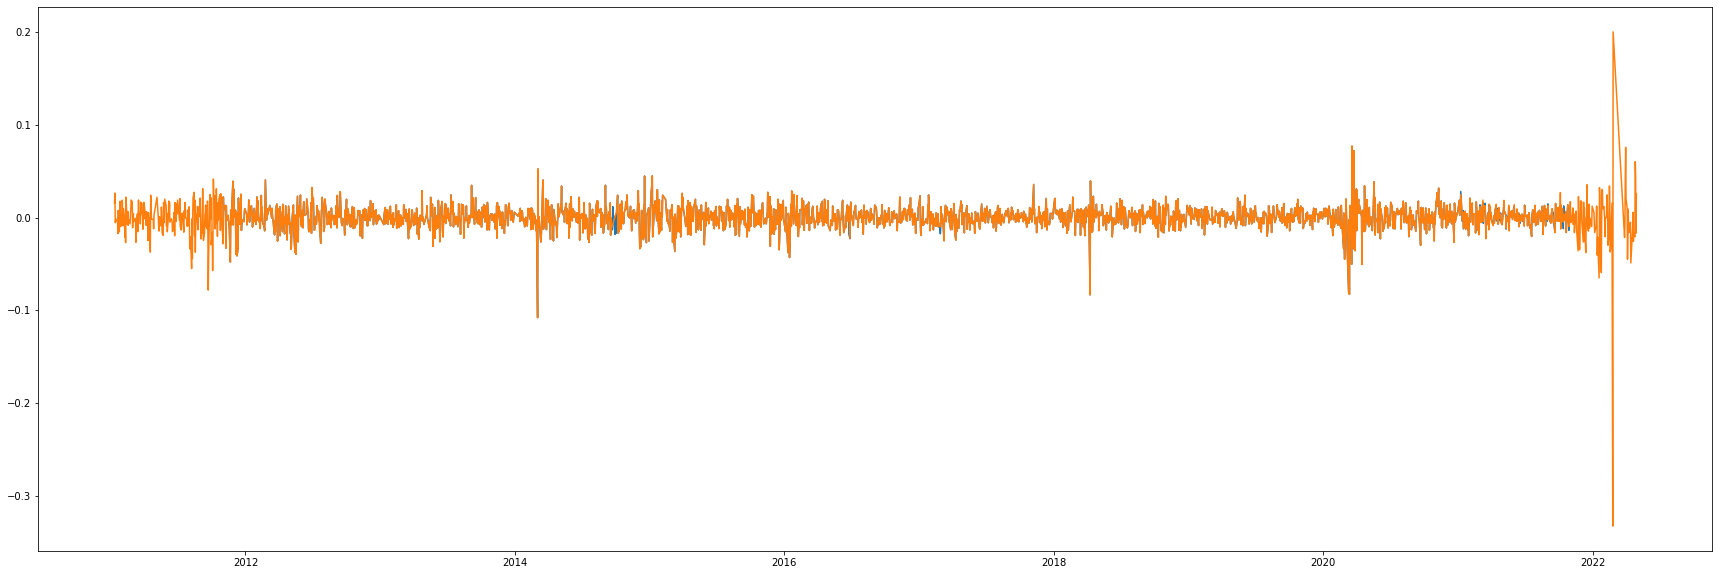

In [1017]:
plt.figure(figsize=(30,10))
plt.plot(data_day.index, data_day.return_imoex)
plt.plot(data_full.date, data_full.return_imoex)

In [1019]:
data_foreign.columns

Index(['date', 'open_inx', 'open_ukx', 'close_inx', 'close_ukx', 'high_inx',
       'high_ukx', 'low_inx', 'low_ukx', 'return_inx', 'volatility_inx',
       'highlow_inx', 'return_ukx', 'volatility_ukx', 'highlow_ukx'],
      dtype='object')